In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
earthquake = pd.read_csv('all_month.csv')
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-01-21T14:40:03.750Z,38.807335,-122.790497,1.3800,0.76,md,14.0,43.00,0.003808,0.0200,...,2025-01-21T14:41:42.038Z,"4 km NNW of The Geysers, CA",earthquake,0.230000,0.490000,0.060,14.0,automatic,nc,nc
1,2025-01-21T14:20:42.064Z,62.323100,-148.594900,34.3000,1.80,ml,NaN,NaN,NaN,0.4800,...,2025-01-21T14:22:03.095Z,"59 km N of Chickaloon, Alaska",earthquake,NaN,1.000000,NaN,NaN,automatic,ak,ak
2,2025-01-21T14:14:46.050Z,35.910333,-117.744333,9.4700,0.78,ml,18.0,48.00,0.071160,0.1000,...,2025-01-21T14:18:07.948Z,"15 km E of Little Lake, CA",earthquake,0.160000,0.360000,0.224,11.0,automatic,ci,ci
3,2025-01-21T14:02:46.410Z,38.740002,-122.718834,1.6100,1.30,md,10.0,138.00,0.022070,0.0100,...,2025-01-21T14:04:21.722Z,"5 km SW of Anderson Springs, CA",earthquake,0.360000,0.610000,0.140,11.0,automatic,nc,nc
4,2025-01-21T13:51:25.543Z,38.491700,-118.472100,6.4000,2.20,ml,19.0,55.56,0.142000,0.3165,...,2025-01-21T13:54:05.392Z,"13 km ESE of Hawthorne, Nevada",earthquake,NaN,0.700000,0.390,10.0,automatic,nn,nn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8718,2024-12-22T15:10:18.980Z,38.820667,-122.843002,2.1600,0.75,md,13.0,120.00,0.006690,0.0100,...,2024-12-22T15:11:56.790Z,"9 km NW of The Geysers, CA",earthquake,0.330000,0.530000,0.130,15.0,automatic,nc,nc
8719,2024-12-22T15:07:49.184Z,60.186600,-153.011700,115.6000,2.10,ml,NaN,NaN,NaN,0.4700,...,2025-01-16T00:45:26.278Z,"72 km E of Port Alsworth, Alaska",earthquake,NaN,0.200000,NaN,NaN,reviewed,ak,ak
8720,2024-12-22T15:05:12.385Z,31.654000,-104.472000,6.0999,1.80,ml,32.0,67.00,0.000000,0.2000,...,2024-12-23T14:09:15.408Z,"58 km S of Whites City, New Mexico",earthquake,0.754229,0.455078,0.200,25.0,reviewed,tx,tx
8721,2024-12-22T15:03:41.850Z,38.782166,-122.766830,2.5600,2.54,md,75.0,38.00,0.011460,0.1000,...,2024-12-22T15:27:14.706Z,"1 km NW of The Geysers, CA",earthquake,0.150000,0.250000,0.160,80.0,automatic,nc,nc


In [257]:
## library to convert to something more meaninful and stop from typing out each time
latitude = earthquake['latitude']
longitude = earthquake['longitude']
distance = earthquake['dmin']
depth_error = earthquake['depthError']
net = earthquake['net']
magerror = earthquake['magError']
mag = earthquake['mag']

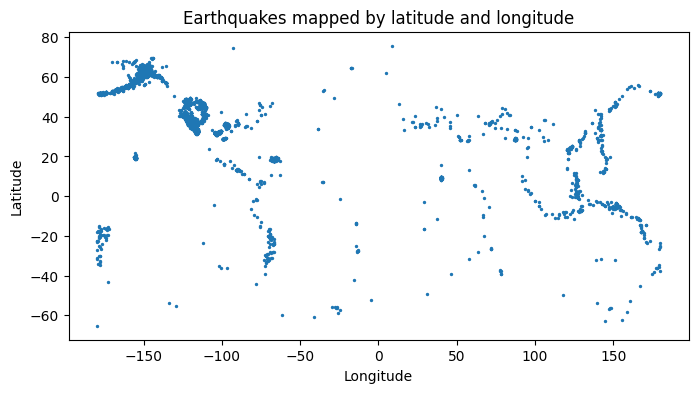

In [291]:

fig, ax = plt.subplots(figsize =(8, 4))
x = np.array(longitude)
y = np.array(latitude)
ax.scatter(longitude,latitude, 2)
ax.set_title('Earthquakes mapped by latitude and longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
## can if/else functions be used for colouring?
filename = 'longlat.jpeg'
plt.savefig(filename, format = 'jpeg')

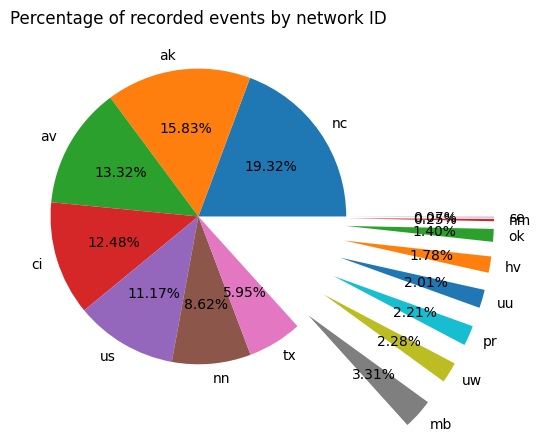

<Figure size 640x480 with 0 Axes>

In [292]:
## pie chart for number of earthquakes per station 
earthquake['net'] = earthquake['net'].astype(str)

# Count the occurrences of each incident
info_source = earthquake['net'].value_counts()
info_source = info_source.reset_index()
y1 = np.array(info_source['count'])
## plot the pie chart
fig, ax = plt.subplots()
ax.pie(y1, labels = info_source['net'], explode= (y1<500), autopct='%1.2f%%')
ax.set_title('Percentage of recorded events by network ID')
# Display the chart
plt.show()
plt.tight_layout()
filename = 'ID_Percentage.jpeg'
plt.savefig(filename, format = 'jpeg')

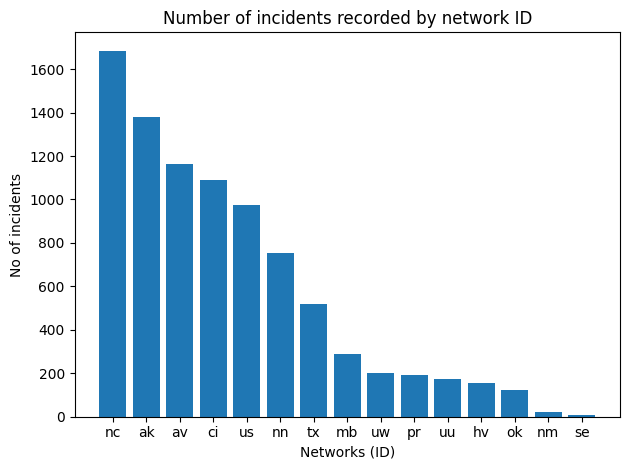

In [296]:
## bar chart for the number of earthquakes by ID
fig, ax = plt.subplots()
ax.bar(info_source['net'], info_source['count'])
ax.set_title('Number of incidents recorded by network ID')
ax.set_xlabel('Networks (ID)')
ax.set_ylabel('No of incidents')
plt.tight_layout()
filename = 'ID_Incident.jpeg'
plt.savefig(filename, format = 'jpeg')

   net       mag
0   ak  1.774294
2   ci  1.207870
3   hv  2.191419
4   mb  0.998927
5   nc  1.158932
6   nm  1.900455
7   nn  1.180452
8   ok  1.019262
9   pr  2.689534
10  se  2.158333
11  tx  1.714066
12  us  4.420637
13  uu  1.479314
14  uw  1.075971


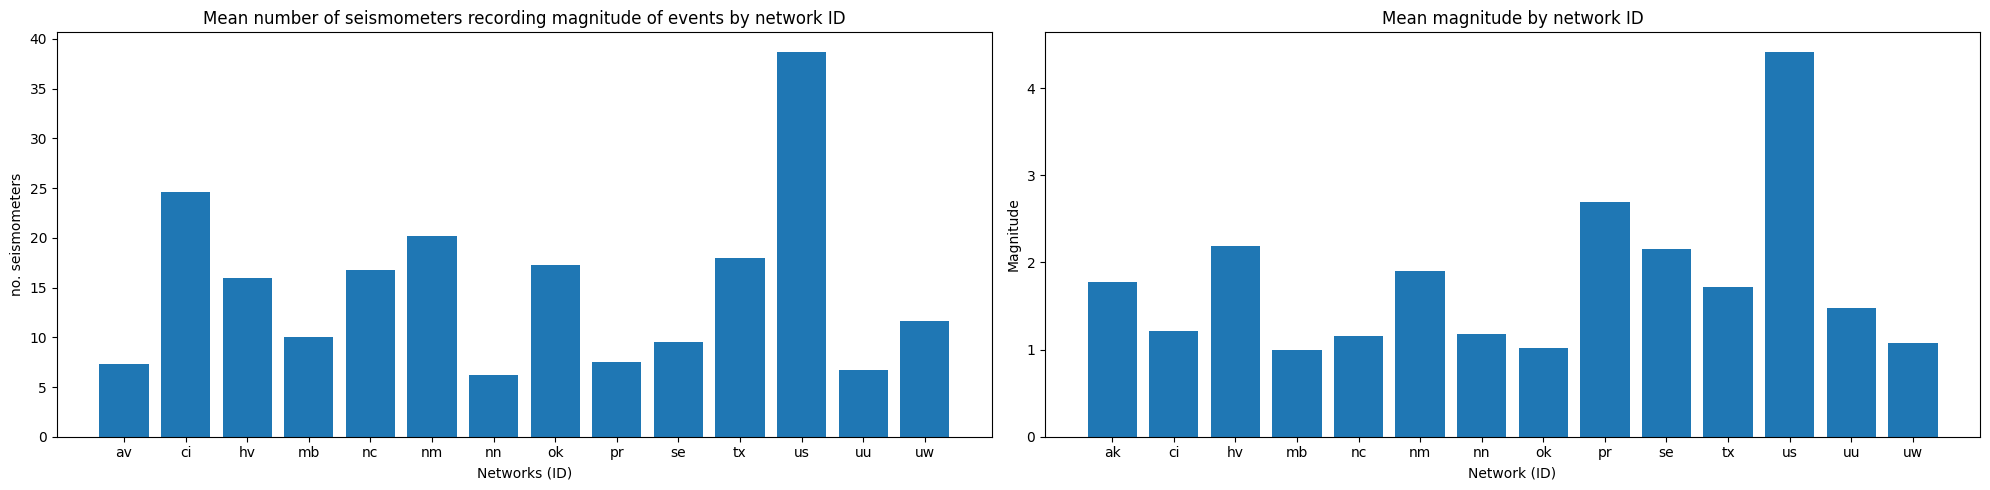

In [299]:
monitors = pd.pivot_table(earthquake, index = earthquake['net'], values = 'magNst', aggfunc = 'mean')
monitors = monitors.reset_index()

mag_mean = pd.pivot_table(earthquake, index = earthquake['net'], values = 'mag', aggfunc = 'mean')
mag_mean = mag_mean.reset_index()
## removing negative values as magnitude needs to be positive
mag_mean = mag_mean[mag_mean['mag']>=0].dropna()
print(mag_mean)
## plotting the graphs
fig = plt.figure(figsize = (20,5))
ax = fig.subplots(1,2)
ax[0].bar(monitors['net'], monitors['magNst'])
ax[0].set_title('Mean number of seismometers recording magnitude of events by network ID')
ax[0].set_xlabel('Networks (ID)')
ax[0].set_ylabel('no. seismometers')
''' ax[2].bar(info_source['net'], info_source['count'])
ax[2].set_xlabel('Networks (ID)')
ax[2].set_ylabel('No of incidents')
ax[2].set_title('Number of earthquakes recorded by network ID')
''' ## not necessary to be displayed as we have it above
ax[1].bar(mag_mean['net'], mag_mean['mag'])
ax[1].set_title('Mean magnitude by network ID')
ax[1].set_xlabel('Network (ID)')
ax[1].set_ylabel('Magnitude')
## 
##comparing tables to see if the mean number of seismometers used per earthquake correlates to the number of earthquakes
plt.tight_layout()
filename = 'ID_Mag_Nst.jpeg'
plt.savefig(filename, format = 'jpeg')